In [1]:
#import libraries
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#load dataset
data_path = Path(r'C:\Users\Lenovo\Documents\GitHub\Housing-Prices-Project\data\house_prices.csv')
df = pd.read_csv(data_path)

In [3]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [4]:
df.tail()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,63 Lac,3225.0,zirakpur,NaN,Ready to Move,2 out of 4,New Property,...,East,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft,NaN,NaN
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,55 Lac,3274.0,zirakpur,NaN,Ready to Move,4 out of 6,Resale,...,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,NaN,1 Covered,NaN,1680 sqft,NaN,NaN
187528,187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",76 Lac,4343.0,zirakpur,1250 sqft,Ready to Move,1 out of 3,Resale,...,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,NaN,NaN,NaN
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,30 Lac,4231.0,zirakpur,NaN,Ready to Move,2 out of 2,Resale,...,NaN,Main Road,Friends Enclave,2,NaN,NaN,NaN,709 sqft,NaN,NaN
187530,187530,3 BHK Ready to Occupy Flat for sale in Affinit...,This exquisite 3 BHK Flat is offered for sale ...,1.18 Cr,6162.0,zirakpur,NaN,Ready to Move,5 out of 13,Resale,...,North - East,"Garden/Park, Pool",Affinity Greens,4,4,1 Covered,Freehold,1915 sqft,NaN,NaN


In [5]:
print(f'This dataset have {df.shape[1]} columns and {df.shape[0]} rows')

This dataset have 21 columns and 187531 rows


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

Most of the columns of this dataset have object datatype and contains null rows.

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Index,187531.0,NaN,NaN,NaN,93765.0,54135.681003,0.0,46882.5,93765.0,140647.5,187530.0
Title,187531,32446,2 BHK Ready to Occupy Flat for sale in Divyasr...,2106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,184508,65634,Multistorey apartment is available for sale. I...,2732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount(in rupees),187531,1561,Call for Price,9684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price (in rupees),169866.0,NaN,NaN,NaN,7583.771885,27241.705819,0.0,4297.0,6034.0,9450.0,6700000.0
location,187531,81,new-delhi,27599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carpet Area,106858,2758,1000 sqft,5285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,186916,1,Ready to Move,186916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Floor,180454,947,2 out of 4,12433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transaction,187448,4,Resale,144172,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Most of the columns of the dataset have object datatype and many columns such as Index, Title, description, Price(in rupees), location, overlooking, society, Dimensions, Plot Area are not required from this project point of view.
* Other columns such as Amount, Carpet Area, Status, Floor, transaction, Furnishing, Facing, Bathroom, Balcony, Car Parking, Ownership, and Super Area have different datatypes and null values. Hence, reuired data preprocessing.

In [8]:
df.duplicated().sum()

np.int64(0)

There is no duplicated value in the data.

In [9]:
df.isnull().sum()

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

This data contains many null values.

# Data Preprocessing

Columns which are not important from EDA and model building point of view is dopped.

In [10]:
# Dropping columns which are not important from EDA point of view
columns_to_drop=['Index','Title','Description','Price (in rupees)','location','overlooking','Society','Dimensions','Plot Area', 'Super Area']
df.drop(columns_to_drop,axis=1,inplace=True)

In [11]:
print('No. of null values are: ')

df.isnull().sum()

No. of null values are: 


Amount(in rupees)         0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
dtype: int64

In [12]:
df

,Amount(in rupees),Carpet Area,Status,Floor,Transaction,Furnishing,facing,Bathroom,Balcony,Car Parking,Ownership
0,42 Lac,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,1,2,NaN,NaN
1,98 Lac,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,2,NaN,1 Open,Freehold
2,1.40 Cr,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,2,NaN,1 Covered,Freehold
3,25 Lac,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,1,1,NaN,NaN
4,1.60 Cr,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,2,NaN,1 Covered,Co-operative Society
...,...,...,...,...,...,...,...,...,...,...,...
187526,63 Lac,NaN,Ready to Move,2 out of 4,New Property,Semi-Furnished,East,3,3,1 Covered,Freehold
187527,55 Lac,NaN,Ready to Move,4 out of 6,Resale,Unfurnished,North - East,3,NaN,1 Covered,NaN
187528,76 Lac,1250 sqft,Ready to Move,1 out of 3,Resale,Furnished,East,3,2,"1 Covered,",Freehold
187529,30 Lac,NaN,Ready to Move,2 out of 2,Resale,Semi-Furnished,NaN,2,NaN,NaN,NaN


Data is stored in different forms in different columns which needs to be normalized according to our requirements.

* Amount column has values in lac or cr which needs to be converted to float.

In [13]:
#Processing amount column
def convert_to_int_amount(Amount_str):

    if pd.isna(Amount_str):
        return np.nan
    if isinstance(Amount_str, (int, float)):
        return Amount_str
    s = Amount_str.strip().lower()
    try:
        if 'cr' in s:
            number_part = float(s.replace('cr', ''))
            return number_part*10**7
        elif 'lac' in s:
            number_part = float(s.replace('lac', ''))
            return number_part*10**5
        else:
            return float(s)
    except ValueError:
        return np.nan

df['Amount(in rupees)'] = df['Amount(in rupees)'].apply(convert_to_int_amount)
df['Amount(in rupees)'] = df['Amount(in rupees)'].fillna(df['Amount(in rupees)'].median())

* Carpet Area and Super Area column have values with sqft and null values which is replaced with median.

In [14]:
#Processing carpet area column
def convert_carpet_area(carpet_str):

    if pd.isna(carpet_str):
        return np.nan
    if isinstance(carpet_str, (int,float)):
        return carpet_str
    s = carpet_str.strip().lower()
    try:
        if 'sqft' in s:
            number = float(s.replace('sqft',''))
            return number
        else:
            return float(s)
    except ValueError:
        return np.nan

df['Carpet Area']=df['Carpet Area'].apply(convert_carpet_area)
df['Carpet Area']=df['Carpet Area'].fillna(df['Carpet Area'].median())

Replacing null values of status, transaction, furnishing, facing, car parking, ownership.

In [15]:
#Processing status column
df['Status']=df['Status'].replace('',np.nan)
df['Status']=df['Status'].fillna('Under Construction')

* Extracting floor number from floor column and replacing null values and converting it to int.

In [16]:
#Processing floor column
def convert_floor(floor_str):
    if pd.isna(floor_str) or not isinstance(floor_str, str):
        return np.nan

    s = floor_str.strip().lower()

    if 'ground' in s:
        if 'lower' in s:
            return -2
        elif 'upper' in s:
            return -1
        else:
            return 0
    else:
        try:
            number = s.split('out')
            num = int(number[0].strip())
            return num
        except ValueError:
            return np.nan

df['Floor'] = df['Floor'].apply(convert_floor)
df['Floor'] = df['Floor'].fillna(df['Floor'].median())

In [158]:
#Processing Transaction column
df['Transaction']=df['Transaction'].replace('', np.nan)
df['Transaction']=df['Transaction'].fillna('Other')

In [159]:
#Processing furnishing column
df['Furnishing']=df['Furnishing'].replace('',np.nan)
df['Furnishing']=df['Furnishing'].fillna('Unknown')

In [160]:
#Processing facing column
df['facing']=df['facing'].replace('',np.nan)
df['facing']=df['facing'].fillna('Unknown')

* Converting bathroom and balcony to int and replacing null values.

In [161]:
#Processing Bathroom column
def convert_bathroom(bathroom_str):

    if pd.isna(bathroom_str):
        return np.nan
    if isinstance(bathroom_str, (int,float)):
        return bathroom_str
    s = bathroom_str.strip().lower()
    try:
        if '>' in s:
            number = int(s.replace('>',''))
            return number
        else:
            return int(s)
    except ValueError:
        return np.nan

df['Bathroom']=df['Bathroom'].apply(convert_bathroom)
bathroom_mode_series = df['Bathroom'].mode()
bathroom_mode_value = bathroom_mode_series[0]
df['Bathroom']=df['Bathroom'].fillna(bathroom_mode_value)

In [162]:
#Processing Balcony column
def convert_balcony(balcony_str):
    if pd.isna(balcony_str):
        return np.nan
    if isinstance(balcony_str,(int,float)):
        return balcony_str

    s = balcony_str.strip().lower()

    try:
        if '>' in s:
            number = int(s.replace('>',''))
            return number
        else:
            return int(s)

    except ValueError:
        return np.nan

df['Balcony']=df['Balcony'].apply(convert_balcony)
balcony_mode_series = df['Balcony'].mode()
balcony_mode_value = balcony_mode_series[0]
df['Balcony']=df['Balcony'].fillna(balcony_mode_value)

In [196]:
#Processing Car Parking
def car_parking(car_parking_str):
    if pd.isna(car_parking_str):
        return np.nan

    s = car_parking_str.strip().lower()

    if ',' in s:
        s = s.replace(',','')

    try:
        new = s.split(' ')
        final = new[-1].strip()
        return final

    except IndexError:
        return np.nan

df['Car Parking']=df['Car Parking'].apply(car_parking)
df['Car Parking']=df['Car Parking'].replace('',np.nan)
df['Car Parking']=df['Car Parking'].fillna('Unknown')

In [174]:
#Processing Ownership
df['Ownership']=df['Ownership'].replace('',np.nan)
df['Ownership']=df['Ownership'].fillna('Unknown')

In [197]:
df.isnull().sum()

Amount(in rupees)    0
Carpet Area          0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
Bathroom             0
Balcony              0
Car Parking          0
Ownership            0
dtype: int64

Now dataset have 0 null values.

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Amount(in rupees)  187531 non-null  float64
 1   Carpet Area        187531 non-null  float64
 2   Status             187531 non-null  object 
 3   Floor              187531 non-null  float64
 4   Transaction        187531 non-null  object 
 5   Furnishing         187531 non-null  object 
 6   facing             187531 non-null  object 
 7   Bathroom           187531 non-null  float64
 8   Balcony            187531 non-null  float64
 9   Car Parking        187531 non-null  object 
 10  Ownership          187531 non-null  object 
dtypes: float64(5), object(6)
memory usage: 15.7+ MB


Now dataset have datatypes as per requirement and is ready for Exploratory Data Analysis(EDA).

In [199]:
df.sample(n=10)

,Amount(in rupees),Carpet Area,Status,Floor,Transaction,Furnishing,facing,Bathroom,Balcony,Car Parking,Ownership
163990,4000000.0,950.0,Ready to Move,14.0,Resale,Semi-Furnished,North - East,2.0,4.0,unknown,Leasehold
55301,15700000.0,1544.0,Ready to Move,3.0,New Property,Semi-Furnished,East,4.0,2.0,covered,Freehold
73818,7000000.0,1071.0,Ready to Move,5.0,Resale,Semi-Furnished,Unknown,2.0,2.0,unknown,Unknown
57527,39400000.0,1544.0,Ready to Move,9.0,New Property,Unfurnished,North - East,5.0,4.0,covered,Freehold
39014,5800000.0,1071.0,Ready to Move,2.0,New Property,Unfurnished,Unknown,2.0,2.0,unknown,Unknown
19975,9600000.0,1071.0,Ready to Move,5.0,Resale,Semi-Furnished,Unknown,2.0,2.0,unknown,Unknown
130059,7800000.0,1071.0,Ready to Move,3.0,Resale,Unfurnished,East,2.0,2.0,unknown,Freehold
17814,6200000.0,1071.0,Ready to Move,4.0,Resale,Unfurnished,Unknown,2.0,1.0,unknown,Power Of Attorney
55852,10500000.0,1470.0,Ready to Move,4.0,New Property,Semi-Furnished,North - East,3.0,3.0,covered,Freehold
68829,39400000.0,1544.0,Ready to Move,14.0,Resale,Unfurnished,East,5.0,2.0,covered,Freehold


In [191]:
df.describe()

,Amount(in rupees),Carpet Area,Floor,Bathroom,Balcony
count,1.875310e+05,187531.000000,187531.000000,187531.000000,187531.00000
mean,1.089325e+07,1091.076329,4.164943,2.426170,2.00120
std,9.050263e+06,254.385922,3.703095,0.867911,0.82244
min,1.000000e+05,592.000000,0.000000,1.000000,1.00000
25%,5.000000e+06,1000.000000,2.000000,2.000000,1.00000
50%,7.800000e+06,1071.000000,3.000000,2.000000,2.00000
75%,1.360000e+07,1136.000000,5.000000,3.000000,2.00000
max,3.940000e+07,1544.000000,14.000000,10.000000,10.00000


# Exploratory Data Analysis (EDA)

## Univariate Analysis

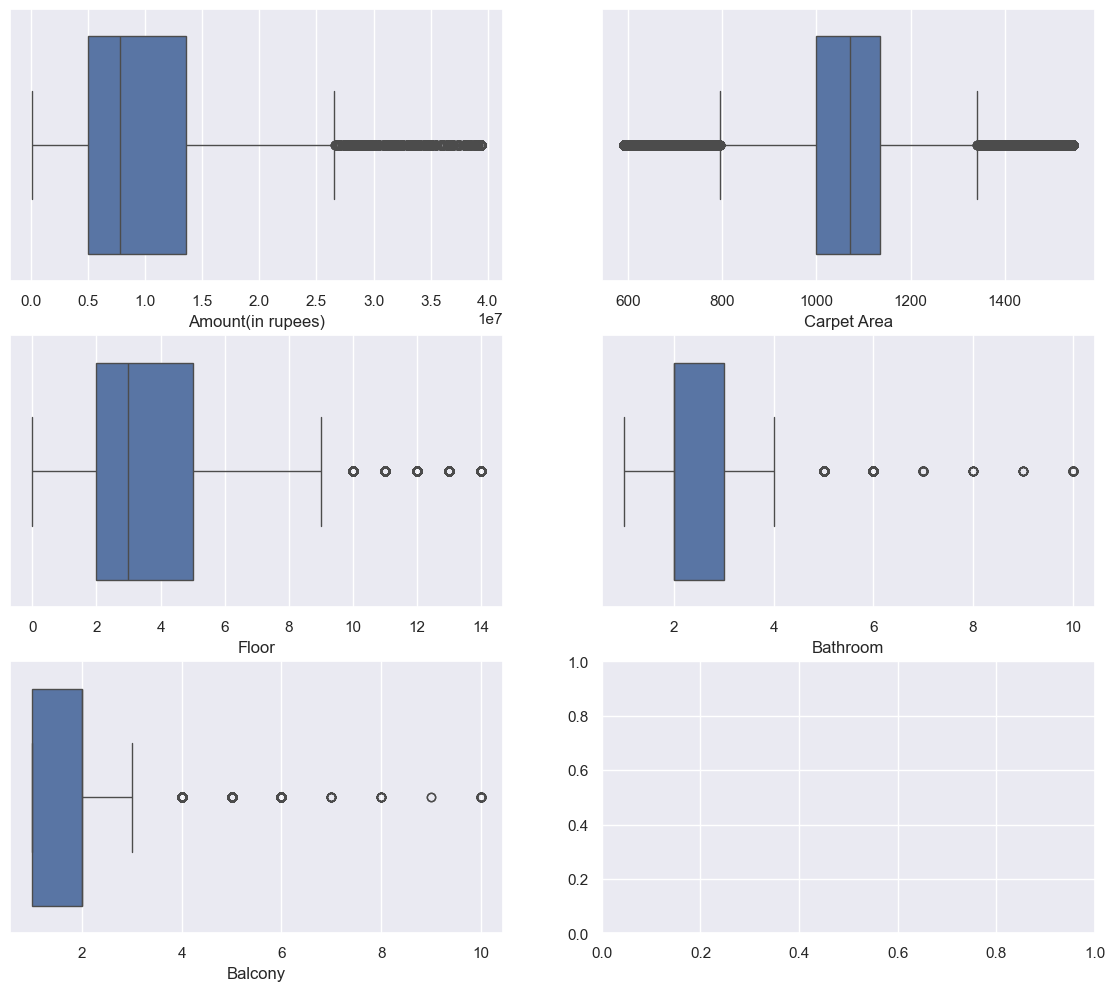

In [192]:
#Univariate Analysis
#1. Boxplot
Num_var = ['Amount(in rupees)', 'Carpet Area', 'Floor', 'Bathroom', 'Balcony']
fig_num, ax_num= plt.subplots(3, 2, figsize=(14, 12))
k = 0
i=0
j=0

for i in range(3):
    for j in range(2):
        if k < len(Num_var):
            sns.boxplot(data=df, x=Num_var[k], ax=ax_num[i,j])
            k += 1

From the above boxplot of float/int variable we can observe that:

* **Amount**, **Floor**, **Bathroom**, and **Balcony** have outlier present in upper limit.
* **Carpet Area** and **Super Area** have outlier present in both upper limit and lower limit.

In [193]:
df.describe()

,Amount(in rupees),Carpet Area,Floor,Bathroom,Balcony
count,1.875310e+05,187531.000000,187531.000000,187531.000000,187531.00000
mean,1.089325e+07,1091.076329,4.164943,2.426170,2.00120
std,9.050263e+06,254.385922,3.703095,0.867911,0.82244
min,1.000000e+05,592.000000,0.000000,1.000000,1.00000
25%,5.000000e+06,1000.000000,2.000000,2.000000,1.00000
50%,7.800000e+06,1071.000000,3.000000,2.000000,2.00000
75%,1.360000e+07,1136.000000,5.000000,3.000000,2.00000
max,3.940000e+07,1544.000000,14.000000,10.000000,10.00000


* Mean of the above numerical variables is highly influenced because of the presence of outliers.
* We will use Inter-Quartile method for outlier treatment.

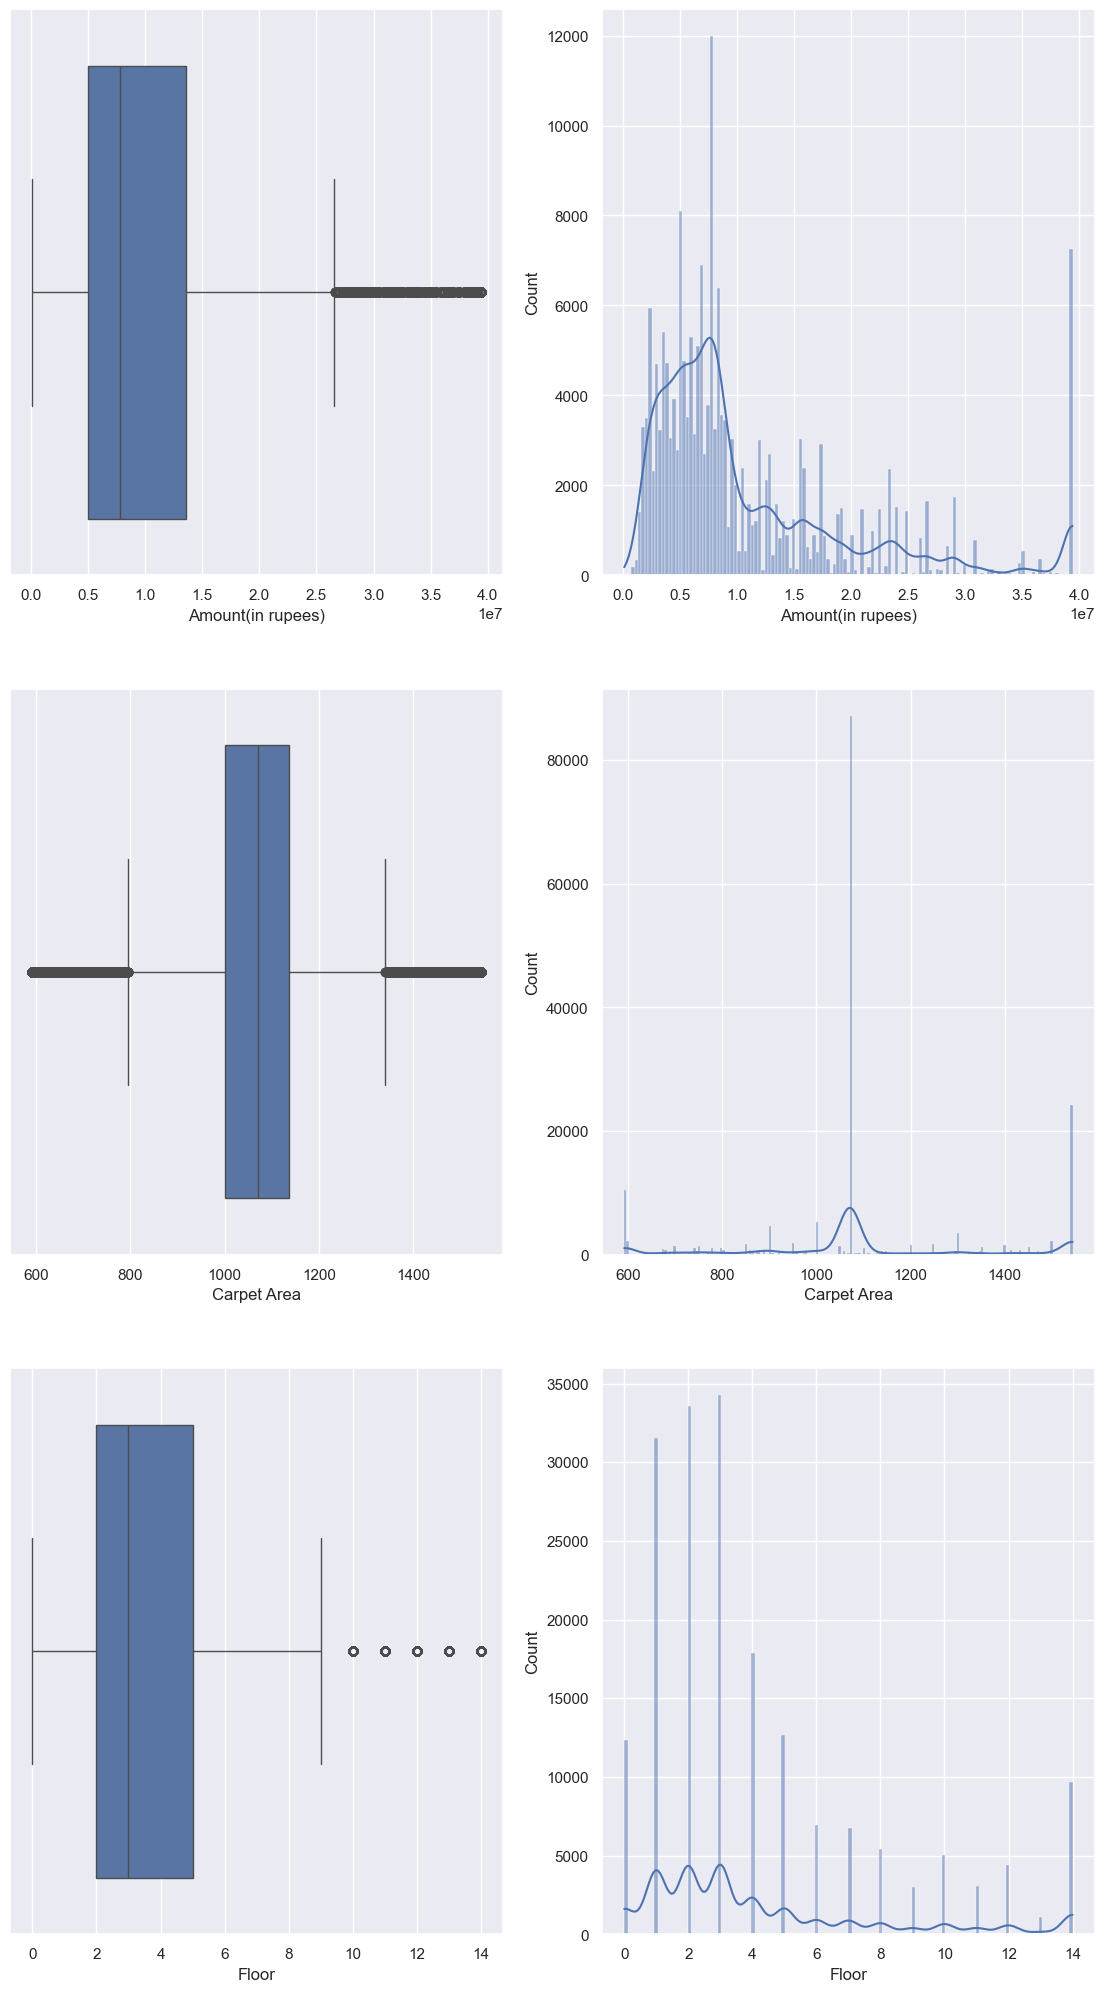

In [194]:
#IQR
Iqr_var = ['Amount(in rupees)', 'Carpet Area', 'Floor']
for i in range(3):
    q1, q3 = np.percentile(df[Iqr_var[i]], [25, 75])
    iqr = q3-q1
    ul = q3 + 3*iqr
    ll = q1 - 3*iqr

    df.loc[df[Iqr_var[i]]>ul,Iqr_var[i]] = ul
    df.loc[df[Iqr_var[i]]<ll,Iqr_var[i]] = ll

i = 0
k = 0

fig_num, ax_num = plt.subplots(3, 2, figsize=(14, 25))
    
for i in range(3):
    sns.boxplot(data=df, x=df[Iqr_var[k]], ax=ax_num[i,0])
    sns.histplot(data=df, x=df[Iqr_var[k]], ax=ax_num[i,1], kde=True)
    k += 1

From the above plots of numerical variables we can observe that:

* **Amount** - Amount is positively skewed, thus most of the house belongs to less than 78 lac and mean>median>mode.
* **Carpet Area** - This variable is normally distributed, hence mean = median.

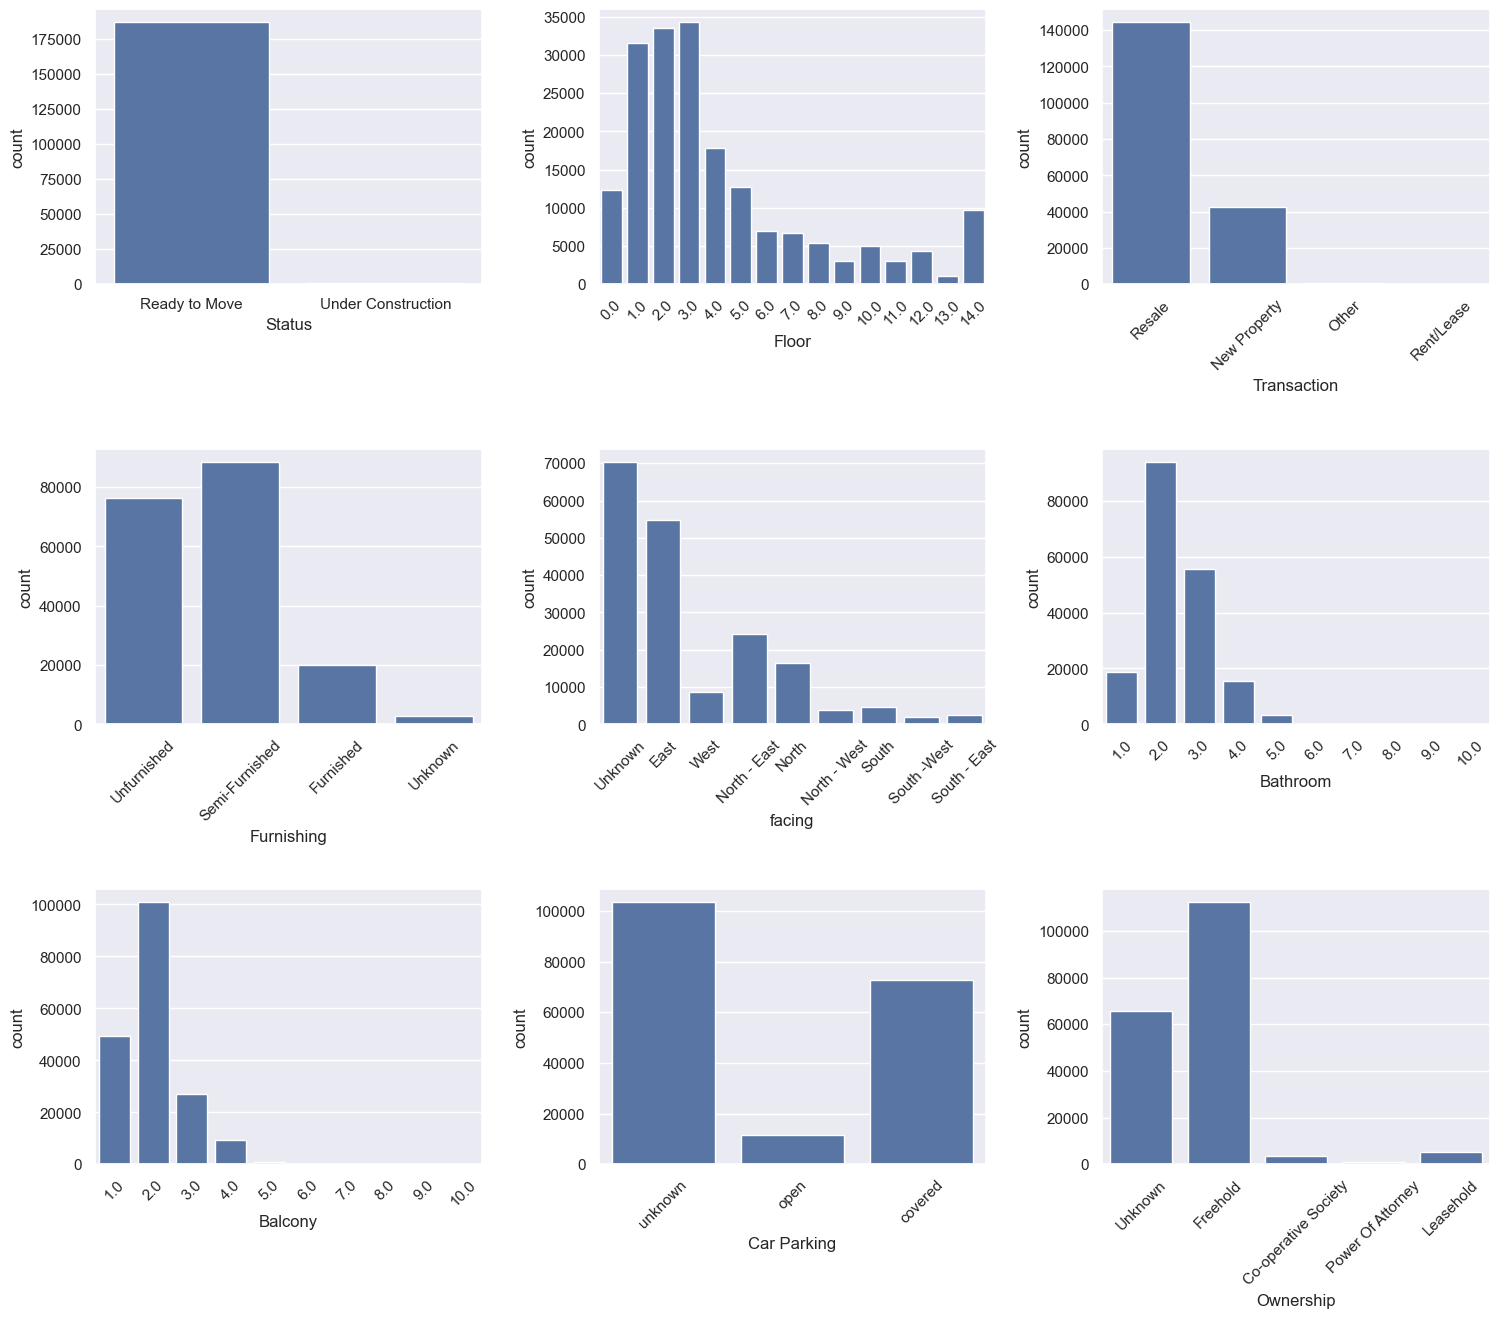

In [200]:
#2. Count plot
Cat_var = ['Status', 'Floor', 'Transaction', 'Furnishing', 'facing', 'Bathroom', 'Balcony', 'Car Parking', 'Ownership']
fig_num, ax_num = plt.subplots(3, 3, figsize=(18, 15))
plt.subplots_adjust(hspace=0.6, wspace=0.3)
ax_num = ax_num.flatten()

for k, column in enumerate(Cat_var):
    sns.countplot(data=df, x=Cat_var[k], ax=ax_num[k])
    if df[column].nunique()>=8 or len(column)>=8:
        ax_num[k].tick_params(axis='x', rotation=45)

plt.show()

Observations from the above plots:

* **Status** - This graph shows that most of the house in ready to move.
* **Floor** - This graph showed that most that most of the house are in 1st, 2nd, and 3rd floor. And distribution is positively skewed.
* **Transaction** - This graph shows that most of the property is for resale.
* **furnishing** - This graph shows that most of the house is semi-furnished, followed by unfurnished, and then furnished.
* **facing** - Most of the houses are east facing.
* **bathroom** - Most of the houses either have 2 or 3 bathroom.
* **Balcony** - Most of the houses either have 2 or 1 balcony.
* **Car Parking** - Most of the houses have covered parking.
* **Ownership** - Most of the houses have freehold ownership.

## Bivariate Analysis

## Multivariate Analysis

## Model Building

In [ ]:
#Define X and Y
X = df.drop('Amount (in rupees)')
Y = df['Amount (in rupees)']
print(X.shape)
print(Y.shape)